This project is used for the KPMG Virtual Experience project with the aim of conducting customer segmentation.

The objective of this project is that KPMG has a client Sprocket Central Pty Ltd which is a company engaged in a medium size bikes & cycling accessories organization.
 
By using 3 datasets namely CustomerDemographic, CustomerAddress, and Transaction, we try to do data exploration, data insight and also do modeling for customer segmentation.

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()


import warnings
warnings.filterwarnings('ignore')

In [ ]:
customer = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', header =1)

In [ ]:
address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', header =1)

In [ ]:
transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', header =1)

# data quick look

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

##customer

In [ ]:
customer

customer_id first_name  last_name  gender  \
0            34.0   Jephthah   Bachmann       U   
1            66.0     Anselm      Gawne    Male   
2          1888.0      Sibyl    Scholtz  Female   
3          3435.0    Stevena    Allcock  Female   
4          2858.0  Benedicto      Radki    Male   
...           ...        ...        ...     ...   
3995       3779.0      Ulick     Daspar       U   
3996       3883.0      Nissa     Conrad       U   
3997       3931.0      Kylie      Epine       U   
3998       3935.0     Teodor  Alfonsini       U   
3999       3998.0     Sarene    Woolley       U   

      past_3_years_bike_related_purchases        DOB           job_title  \
0                                    59.0 1843-12-21     Legal Assistant   
1                                    46.0 2002-03-11   Account Executive   
2                                    67.0 2002-01-26        Food Chemist   
3                                    80.0 2002-01-15       Senior Editor   
4                                     4.0 2002-01-09  Recruiting Manager   
...                                   ...        ...                 ...   
3995                                 68.0        NaT                 NaN   
3996                                 35.0        NaT     Legal Assistant   
3997                                 19.0        NaT                 NaN   
3998                                 72.0        NaT                 NaN   
3999                                 60.0        NaT   Assistant Manager   

     job_industry_category     wealth_segment deceased_indicator  \
0                       IT  Affluent Customer                  N   
1              Argiculture     High Net Worth                  N   
2                   Health      Mass Customer                  N   
3                      NaN  Affluent Customer                  N   
4                      NaN      Mass Customer                  N   
...                    ...                ...                ...   
3995                    IT  Affluent Customer                  N   
3996                    IT      Mass Customer                  N   
3997                    IT     High Net Worth                  N   
3998                    IT     High Net Worth                  N   
3999                    IT     High Net Worth                  N   

              default owns_car  tenure  
0                 NaN       No    20.0  
1       ï½ï½¨(Â´âï½â©       No     1.0  
2                 NaN      Yes     1.0  
3     ÅâÂ´â°ËÃÂ¨ËÃâââ       No     1.0  
4        testâ testâ«      Yes     1.0  
...               ...      ...     ...  
3995              NaN       No     NaN  
3996              NaN       No     NaN  
3997              NaN      Yes     NaN  
3998              NaN      Yes     NaN  
3999              NaN       No     NaN  

[4000 rows x 13 columns]

In [ ]:
customer[customer['job_title']=='Senior Editor']

customer_id      first_name    last_name  gender  \
3          3435.0         Stevena      Allcock  Female   
108         164.0          Aarika   Van Vuuren  Female   
568        3707.0          Marten     Posnette    Male   
600        2789.0        Violetta      Bucksey  Female   
1040       3932.0          Hadley  Veracruysse    Male   
1220       2465.0          Paloma       Nilles  Female   
1256        335.0           Debee     Martynov  Female   
1277        181.0           Pavla      Braunle  Female   
1484       3257.0          Travis       Hulatt    Male   
1641       1846.0         Lorette       Daspar  Female   
1670        727.0           Lenci      Duerden    Male   
1675       2528.0          Cassie    Toffaloni    Male   
1780       3967.0          Lillis  Dobrowolski  Female   
1990          5.0  Sheila-kathryn       Calton  Female   
2097       3181.0            Ferd    Chominski    Male   
2207       2102.0            Carl      Penquet    Male   
2560       3569.0           Janel        Daice  Female   
2621       2081.0           Gelya       Coaker  Female   
2707        489.0           Tresa        Reeks  Female   
2749       2803.0          Ailsun    Hawlgarth  Female   
2874       1101.0           Haily   McWilliams  Female   
2914        676.0          Curtis          NaN    Male   
2925        790.0          Yvonne          NaN  Female   
3151        739.0           Arnie         Zorn    Male   
3538       3790.0          Kurtis       Morson    Male   
3674       2807.0           Lynna       Revens  Female   
3749       1421.0        Mallorie        Gouth  Female   
3979       3222.0         Caralie      Sellors       U   

      past_3_years_bike_related_purchases        DOB      job_title  \
3                                    80.0 2002-01-15  Senior Editor   
108                                  55.0 1999-08-07  Senior Editor   
568                                  10.0 1993-05-16  Senior Editor   
600                                  66.0 1992-11-30  Senior Editor   
1040                                 85.0 1986-07-10  Senior Editor   
1220                                 31.0 1984-06-12  Senior Editor   
1256                                 20.0 1983-04-19  Senior Editor   
1277                                 49.0 1982-11-21  Senior Editor   
1484                                 64.0 1980-05-07  Senior Editor   
1641                                  4.0 1978-12-18  Senior Editor   
1670                                 98.0 1978-10-10  Senior Editor   
1675                                 81.0 1978-09-23  Senior Editor   
1780                                 90.0 1978-04-18  Senior Editor   
1990                                 56.0 1977-05-13  Senior Editor   
2097                                 39.0 1976-09-29  Senior Editor   
2207                                 80.0 1976-01-08  Senior Editor   
2560                                 24.0 1973-05-18  Senior Editor   
2621                                 69.0 1972-06-21  Senior Editor   
2707                                 18.0 1971-05-31  Senior Editor   
2749                                 95.0 1970-09-30  Senior Editor   
2874                                 76.0 1968-12-22  Senior Editor   
2914                                 51.0 1968-05-19  Senior Editor   
2925                                 22.0 1968-03-24  Senior Editor   
3151                                 36.0 1964-12-13  Senior Editor   
3538                                 91.0 1959-05-31  Senior Editor   
3674                                  9.0 1957-06-18  Senior Editor   
3749                                 74.0 1956-04-14  Senior Editor   
3979                                 40.0        NaT  Senior Editor   

     job_industry_category     wealth_segment deceased_indicator  \
3                      NaN  Affluent Customer                  N   
108                 Retail  Affluent Customer                  N   
568                 Retail      Mass Customer              

**cleaning**

In [ ]:
customer.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
656/4000

0.164

In [ ]:
customer['job_industry_category'] = customer['job_industry_category'].fillna(value='other')

**note!!**

imputation the missing values on job_industry_category using "other" because we i do the data inspection, I couldn't find a pattern in the other data that could be used as imputation, so I used other as imputation.

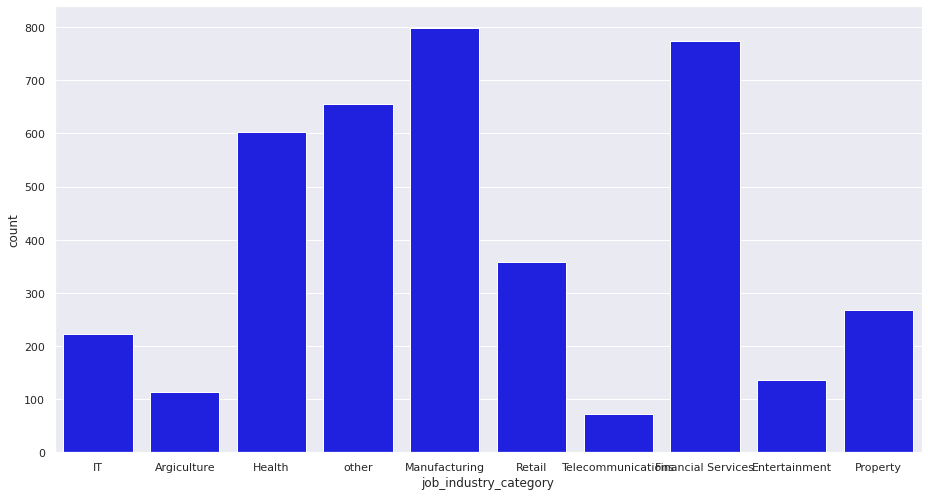

In [ ]:
    plt.rcParams['figure.figsize'] = (13,7)
    plt.subplot()
    sns.countplot(x=customer['job_industry_category'], color='blue')
    plt.tight_layout()

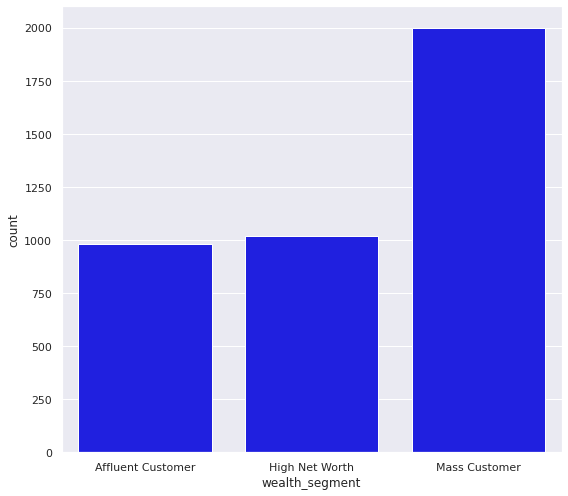

In [ ]:
plt.rcParams['figure.figsize'] = (8,7)
plt.subplot()
sns.countplot(x=customer['wealth_segment'], color='blue')
plt.tight_layout()

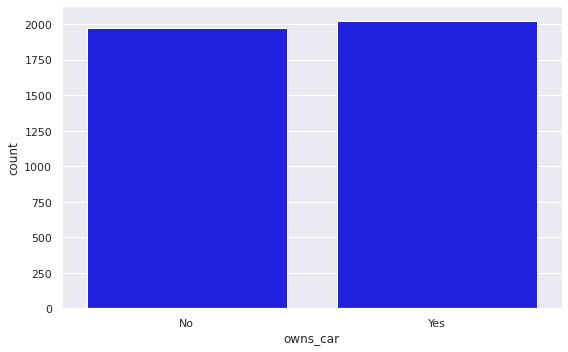

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
plt.subplot()
sns.countplot(x=customer['owns_car'], color='blue')
plt.tight_layout()

## address

In [ ]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3999 non-null   float64
 1   address             3999 non-null   object 
 2   postcode            3999 non-null   float64
 3   state               3999 non-null   object 
 4   country             3999 non-null   object 
 5   property_valuation  3999 non-null   float64
dtypes: float64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
address.head(2)

customer_id              address  postcode            state    country  \
0          1.0   060 Morning Avenue    2016.0  New South Wales  Australia   
1          2.0  6 Meadow Vale Court    2153.0  New South Wales  Australia   

   property_valuation  
0                10.0  
1                10.0

In [ ]:
address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
 1021/(2140+1021+838)

0.25531382845711426

**Change the Value**

In [ ]:
address['state'] = address['state'].replace({'New South Wales':'NSW', 'Victoria':'VIC'})

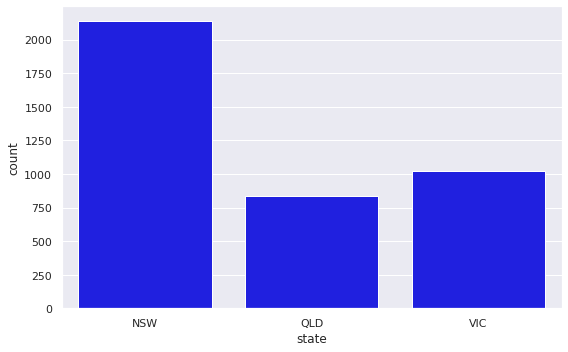

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
plt.subplot()
sns.countplot(x=address['state'], color='blue')
plt.tight_layout()

## transaction

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  float64       
 1   product_id               20000 non-null  float64       
 2   customer_id              20000 non-null  float64       
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transaction

transaction_id  product_id  customer_id transaction_date  online_order  \
0                 1.0         2.0       2950.0       2017-02-25           0.0   
1                 2.0         3.0       3120.0       2017-05-21           1.0   
2                 3.0        37.0        402.0       2017-10-16           0.0   
3                 4.0        88.0       3135.0       2017-08-31           0.0   
4                 5.0        78.0        787.0       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995         19996.0        51.0       1018.0       2017-06-24           1.0   
19996         19997.0        41.0        127.0       2017-11-09           1.0   
19997         19998.0        87.0       2284.0       2017-04-14           1.0   
19998         19999.0         6.0       2764.0       2017-07-03           0.0   
19999         20000.0        11.0       1144.0       2017-09-22           1.0   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       list_price  standard_cost  product_first_sold_date  
0           71.49          53.62                  41245.0  
1         2091.47         388.92                  41701.0  
2         1793.43         248.82                  36361.0  
3         1198.46         381.10                  36145.0  
4         1765.30         709.48                  42226.0  
...           ...            ...                      ...  
19995     2005.66        1203.40                  37823.0  
19996      416.98         312.74                  35560.0  
19997     1636.90          44.71                  40410.0  
19998      227.88         136.73                  38216.0  
19999     1775.81        1580.47                  36334.0  

[20000 rows x 13 columns]

In [ ]:
transaction[transaction['customer_id']==127.0]

transaction_id  product_id  customer_id transaction_date  online_order  \
1154           1155.0        16.0        127.0       2017-01-03           1.0   
2785           2786.0        85.0        127.0       2017-12-07           1.0   
3217           3218.0        26.0        127.0       2017-03-03           0.0   
5759           5760.0        42.0        127.0       2017-01-21           1.0   
11051         11052.0         6.0        127.0       2017-09-11           1.0   
11245         11246.0        53.0        127.0       2017-06-09           1.0   
11310         11311.0         9.0        127.0       2017-02-11           1.0   
17846         17847.0        21.0        127.0       2017-06-07           1.0   
18956         18957.0        62.0        127.0       2017-11-27           0.0   
19996         19997.0        41.0        127.0       2017-11-09           1.0   

      order_status           brand product_line product_class product_size  \
1154      Approved  Norco Bicycles     Standard          high        small   
2785      Approved        WeareA2B     Standard        medium       medium   
3217      Approved        WeareA2B     Standard        medium       medium   
5759      Approved      OHM Cycles         Road        medium        small   
11051     Approved      OHM Cycles     Standard          high       medium   
11245     Approved      OHM Cycles     Standard        medium       medium   
11310     Approved      OHM Cycles         Road        medium       medium   
17846     Approved           Solex     Standard        medium        large   
18956     Approved           Solex     Standard        medium       medium   
19996     Approved           Solex         Road        medium       medium   

       list_price  standard_cost  product_first_sold_date  
1154      1661.92        1479.11                  34586.0  
2785       752.64         205.36                  42218.0  
3217      1992.93         762.63                  34115.0  
5759      1810.00        1610.90                  39526.0  
11051      227.88         136.73                  37659.0  
11245      795.34         101.58                  35470.0  
11310      742.54         667.40                  33549.0  
17846     1071.23         380.74                  35160.0  
18956      478.16         298.72                  34143.0  
19996      416.98         312.74                  35560.0

In [ ]:
transaction.shape

(20000, 13)

Segmentation model -> RFMP 
- recency = transaction_date
- frequency = count transaction id based on customer id
- monetary = list_price
- profit = list_price - standrad_price

# data cleaning

## duplicate

In [ ]:
transaction.duplicated().sum()

0

## missing value

In [ ]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
nul = pd.isnull(transaction['standard_cost'])

In [ ]:
transaction[nul]

transaction_id  product_id  customer_id transaction_date  online_order  \
136             137.0         0.0        431.0       2017-09-23           0.0   
159             160.0         0.0       3300.0       2017-08-27           0.0   
366             367.0         0.0       1614.0       2017-03-10           0.0   
406             407.0         0.0       2559.0       2017-06-14           1.0   
676             677.0         0.0       2609.0       2017-07-02           0.0   
...               ...         ...          ...              ...           ...   
19340         19341.0         0.0        443.0       2017-12-26           1.0   
19383         19384.0         0.0       2407.0       2017-06-11           0.0   
19793         19794.0         0.0       2860.0       2017-01-13           0.0   
19859         19860.0         0.0       2468.0       2017-06-24           1.0   
19871         19872.0         0.0         61.0       2017-03-17           1.0   

      order_status brand product_line product_class product_size  list_price  \
136       Approved   NaN          NaN           NaN          NaN     1942.61   
159       Approved   NaN          NaN           NaN          NaN     1656.86   
366       Approved   NaN          NaN           NaN          NaN      850.89   
406       Approved   NaN          NaN           NaN          NaN      710.59   
676       Approved   NaN          NaN           NaN          NaN     1972.01   
...            ...   ...          ...           ...          ...         ...   
19340     Approved   NaN          NaN           NaN          NaN      744.54   
19383     Approved   NaN          NaN           NaN          NaN     1098.18   
19793     Approved   NaN          NaN           NaN          NaN      868.56   
19859     Approved   NaN          NaN           NaN          NaN     1497.43   
19871     Approved   NaN          NaN           NaN          NaN      867.92   

       standard_cost  product_first_sold_date  
136              NaN                      NaN  
159              NaN                      NaN  
366              NaN                      NaN  
406              NaN                      NaN  
676              NaN                      NaN  
...              ...                      ...  
19340            NaN                      NaN  
19383            NaN                      NaN  
19793            NaN                      NaN  
19859            NaN                      NaN  
19871            NaN                      NaN  

[197 rows x 13 columns]

In [ ]:
transaction[transaction['product_id']==0]

transaction_id  product_id  customer_id transaction_date  online_order  \
34               35.0         0.0       2171.0       2017-08-20           0.0   
39               40.0         0.0       2448.0       2017-11-28           1.0   
54               55.0         0.0       3140.0       2017-09-18           0.0   
60               61.0         0.0       1839.0       2017-02-24           0.0   
63               64.0         0.0       2000.0       2017-07-08           0.0   
...               ...         ...          ...              ...           ...   
19921         19922.0         0.0       1869.0       2017-01-06           1.0   
19941         19942.0         0.0        966.0       2017-07-30           1.0   
19967         19968.0         0.0       2751.0       2017-04-06           0.0   
19987         19988.0         0.0         13.0       2017-04-05           1.0   
19988         19989.0         0.0        714.0       2017-04-27           1.0   

      order_status           brand product_line product_class product_size  \
34        Approved  Norco Bicycles         Road        medium       medium   
39        Approved  Norco Bicycles         Road        medium       medium   
54        Approved  Norco Bicycles     Standard           low       medium   
60        Approved      OHM Cycles         Road          high        large   
63        Approved   Trek Bicycles     Standard        medium       medium   
...            ...             ...          ...           ...          ...   
19921     Approved  Norco Bicycles         Road        medium       medium   
19941     Approved      OHM Cycles     Standard           low       medium   
19967     Approved        WeareA2B     Standard        medium       medium   
19987     Approved  Norco Bicycles         Road        medium       medium   
19988     Approved  Norco Bicycles     Standard           low       medium   

       list_price  standard_cost  product_first_sold_date  
34         544.05         376.84                  38647.0  
39         544.05         376.84                  38647.0  
54         363.01         290.41                  38482.0  
60          12.01           7.21                  34244.0  
63         499.53         388.72                  39031.0  
...           ...            ...                      ...  
19921      543.39         407.54                  37698.0  
19941       71.16          56.93                  38647.0  
19967       60.34          45.26                  34165.0  
19987      544.05         376.84                  42105.0  
19988      363.01         290.41                  37626.0  

[1378 rows x 13 columns]

In [ ]:
197/20000

0.00985

The missing value is less than 1% and the result of the investigation was that there was also a missing value in another column with the same row so it was not possible to impute the value with related data, so I decided to remove the missing value.

In [ ]:
transaction.dropna(subset = ['standard_cost'], inplace=True)

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  float64       
 1   product_id               19803 non-null  float64       
 2   customer_id              19803 non-null  float64       
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

I decided to only clean up the missing values in standrad_cost because I only use the transaction date, order id, customer id, and list price columns for future analysis.

# Descriptive Statistic

In [ ]:
print('columns and number of unique values')
dict=[]
for i in transaction.columns:
    print(f'{i} -> {transaction[i].nunique()}')

columns and number of unique values
transaction_id -> 19803
product_id -> 101
customer_id -> 3494
transaction_date -> 364
online_order -> 2
order_status -> 2
brand -> 6
product_line -> 4
product_class -> 3
product_size -> 3
list_price -> 100
standard_cost -> 103
product_first_sold_date -> 100


Observation Result:
- there are 3494 customer id
- there are 19803 transaction id
- transaction date already has the correct data type
- there are 100 list price
- there are 103 standard costs

**change the data type that should be object became object**

In [ ]:
transaction[["transaction_id","product_id","customer_id","online_order"]] = transaction[["transaction_id","product_id","customer_id","online_order"]].astype(np.object)

**Change the value of online order**

In [ ]:
transaction['online_order'] = transaction['online_order'].replace({1:'Yes', 0:'No'})

**look for describtive statistic for obejct variabel**

In [ ]:
transaction.describe(include=['object'])

transaction_id  product_id  customer_id online_order order_status  \
count          19803.0     19803.0      19803.0        19445        19803   
unique         19803.0       101.0       3494.0            2            2   
top                1.0         0.0       1068.0          Yes     Approved   
freq               1.0      1181.0         14.0         9739        19625   

        brand product_line product_class product_size  
count   19803        19803         19803        19803  
unique      6            4             3            3  
top     Solex     Standard        medium       medium  
freq     4253        14176         13826        12990

observation result:
- the most order that have made is from online order
- most of order status are approved
- the highest brand that have been ordered in 2017 was Solex
- there are 4 type of product_line and the most ordered was the standard one
- there are 3 class of product_class and the most ordered was the medium one
- product_size have 3 type, but the most ordered on 2017 was medium size

**look for descriptive statistic for numeric variable**

In [ ]:
transaction.describe()

list_price  standard_cost  product_first_sold_date
count  19803.000000   19803.000000             19803.000000
mean    1107.997866     556.046951             38199.776549
std      582.770460     405.955660              2875.201110
min       12.010000       7.210000             33259.000000
25%      575.270000     215.140000             35667.000000
50%     1163.890000     507.580000             38216.000000
75%     1635.300000     795.100000             40672.000000
max     2091.470000    1759.850000             42710.000000

observation result:
- list orice has the lowest price at 12.02 dollar and the highest 2091.47 dollar with average price in about 1163.89 dollar
- standard_cost have the lowest cost at 7.21 dollar and the highest 1759.85 dollar with average cost at 507.58 dollar

# Univariate Analysis

In [ ]:
num = transaction.select_dtypes(include=[np.number])
cat = transaction.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')
Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')


## Numerical 

### KDE Plot

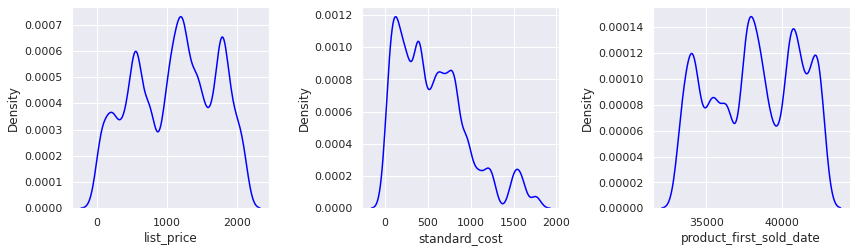

In [ ]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=transaction[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

**KDE Plot Analysis:**
It can be seen that standard_cost has a positively skewed distribution.

### Violin Plot 

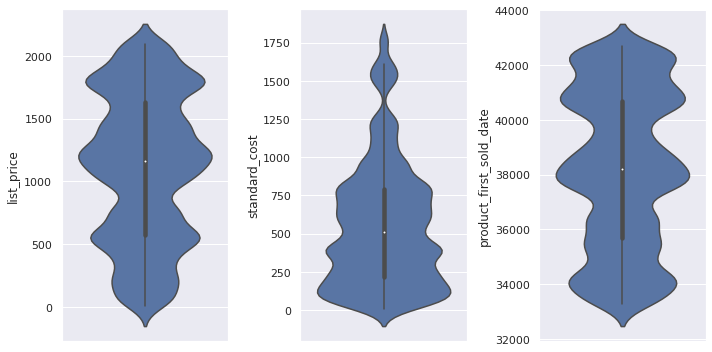

In [ ]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1,len(features),i+1)
    sns.violinplot(y=transaction[features[i]])
    plt.tight_layout()    

**Violin Plot Analysis:**
It can be seen that standard cost has more outliers than list price.

**check the outlier**

In [ ]:
Q1 = transaction['standard_cost'].quantile(0.25)
Q3 = transaction['standard_cost'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
outlier = ~((transaction['standard_cost'] >= low_limit) & (transaction['standard_cost'] <= high_limit))
outlier_standard_cost = transaction[outlier]
outlier_standard_cost.shape

(195, 13)

it turns out that there are only 195 row values that are outliers

## Categorical

### Countplot Analysis

In [ ]:
cat.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')

In [ ]:
feature = cat.drop(['transaction_id','product_id','customer_id','transaction_date'], axis=1).columns
features

Index(['list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')

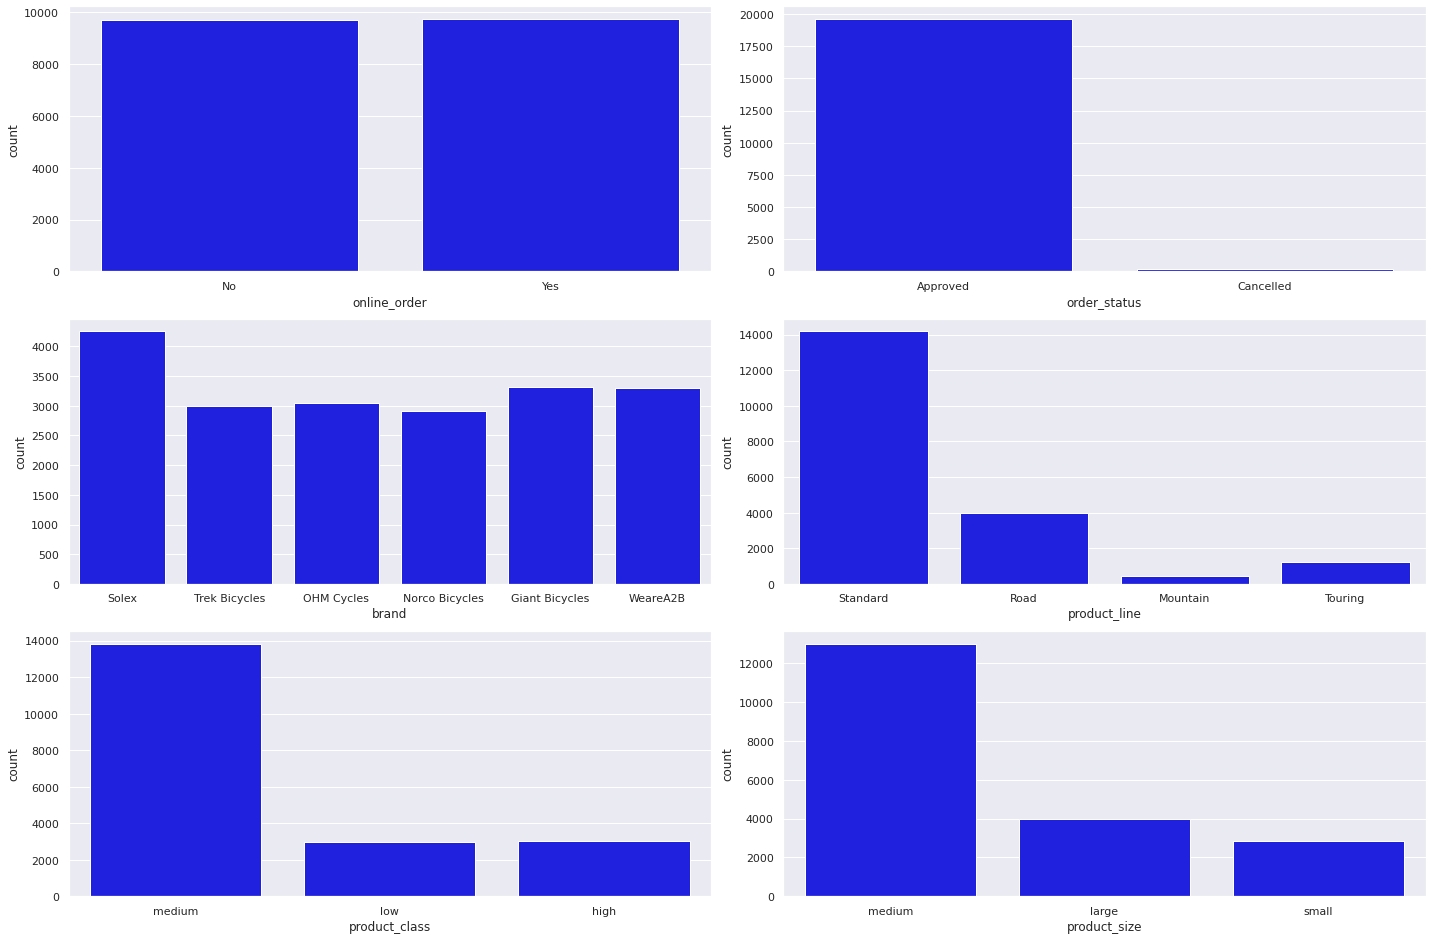

In [ ]:
for i in range(0, len(feature)):
    plt.rcParams['figure.figsize'] = (20,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=transaction[feature[i]], color='blue')
    plt.tight_layout()

observation result:
- From the count plot, it turns out that the composition of customers ordering online and not online looks balanced.
- Only a few orders were canceled
- Solex occupies the first position as the customer's favorite brand with a gap that tends to be far from other brands.
- The most ordered products are standard product lines with medium class and medium size products as well.

### trit

In [ ]:
transaction['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [ ]:
4253/(4253+3312+3295+3043+2990+2910)

0.21476543957986163

In [ ]:
transaction['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [ ]:
14176/(14176+3970+1234+423)

0.7158511336666161

# data prep before clustering

## recency

In [ ]:
last_date = transaction['transaction_date'].max()
last_date

Timestamp('2017-12-30 00:00:00')

In [ ]:
import datetime as dt
NOW = dt.date(2017,12,30)

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  object        
 1   product_id               19803 non-null  object        
 2   customer_id              19803 non-null  object        
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transaction['transaction_date'] = transaction['transaction_date'].dt.date

## frequency

we'll count the transaction_id become our freqeuncy on the aggregation step based on user_id

## Monetary

monetary column is the list_price column

## Profit

In [ ]:
transaction['profit'] = transaction['list_price']-transaction['standard_cost']
transaction.head(2)

transaction_id product_id customer_id transaction_date online_order  \
0            1.0        2.0      2950.0       2017-02-25           No   
1            2.0        3.0      3120.0       2017-05-21          Yes   

  order_status          brand product_line product_class product_size  \
0     Approved          Solex     Standard        medium       medium   
1     Approved  Trek Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date   profit  
0       71.49          53.62                  41245.0    17.87  
1     2091.47         388.92                  41701.0  1702.55

# table rfm

## Aggregation

Aggreagate the data based on `customer_id`

In [ ]:
rfmTable = transaction.groupby('customer_id').agg({'transaction_date': lambda x: (NOW - x.max()).days, # Recency
                                        'transaction_id': lambda x: len(x),      # Frequency
                                        'list_price': lambda x: x.sum(),         #Monetary
                                        'profit': lambda x: x.sum()}) # Profit

rfmTable['transaction_date'] = rfmTable['transaction_date'].astype(int)
rfmTable.rename(columns={'transaction_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'list_price': 'monetary'}, inplace=True)

In [ ]:
rfmTable

recency  frequency  monetary       profit
customer_id                                           
1.0                7         11   9084.45  3018.090000
2.0              128          3   4149.07  2226.260000
3.0              102          8   9888.23  3362.810000
4.0              195          2   1047.72   220.570000
5.0               16          6   5903.20  2394.940000
...              ...        ...       ...          ...
3497.0            52          3   3744.07  1648.320000
3498.0           127          6   5177.06  3147.330000
3499.0            51          7   7673.48  4955.250000
3500.0           144          6   4922.41  1785.860000
5034.0            84          3   1519.92   269.484972

[3494 rows x 4 columns]

In [ ]:
transaction[transaction['customer_id']==1].sort_values('transaction_date')

transaction_id product_id customer_id transaction_date online_order  \
9784          9785.0       72.0         1.0       2017-01-05           No   
13423        13424.0        2.0         1.0       2017-02-21           No   
14485        14486.0       23.0         1.0       2017-03-27           No   
18969        18970.0       11.0         1.0       2017-03-29          Yes   
3764          3765.0       38.0         1.0       2017-04-06          Yes   
5156          5157.0       47.0         1.0       2017-05-11          Yes   
13643        13644.0       25.0         1.0       2017-05-19           No   
15662        15663.0       32.0         1.0       2017-06-04          Yes   
16422        16423.0        9.0         1.0       2017-12-09          Yes   
14930        14931.0       31.0         1.0       2017-12-14          Yes   
93              94.0       86.0         1.0       2017-12-23           No   

      order_status           brand product_line product_class product_size  \
9784      Approved  Norco Bicycles     Standard        medium       medium   
13423     Approved           Solex     Standard        medium       medium   
14485     Approved  Norco Bicycles     Mountain           low        small   
18969     Approved  Giant Bicycles     Standard          high       medium   
3764      Approved           Solex     Standard        medium       medium   
5156      Approved   Trek Bicycles         Road           low        small   
13643     Approved  Giant Bicycles         Road        medium       medium   
15662     Approved  Giant Bicycles     Standard        medium       medium   
16422     Approved      OHM Cycles         Road        medium       medium   
14930     Approved  Giant Bicycles     Standard        medium       medium   
93        Approved      OHM Cycles     Standard        medium       medium   

       list_price  standard_cost  product_first_sold_date  profit  
9784       360.40         270.30                  37873.0   90.10  
13423       71.49          53.62                  38573.0   17.87  
14485      688.63         612.88                  33455.0   75.75  
18969     1274.93         764.96                  35378.0  509.97  
3764      1577.53         826.51                  39526.0  751.02  
5156      1720.70        1531.42                  37823.0  189.28  
13643     1538.99         829.65                  33552.0  709.34  
15662      642.70         211.37                  40618.0  431.33  
16422      742.54         667.40                  37838.0   75.14  
14930      230.91         173.18                  37337.0   57.73  
93         235.63         125.07                  38482.0  110.56

In [ ]:
(NOW - dt.date(2017,12,23)).days==7

True

**Our data is correct!!**

In [ ]:
rfmSegmentation = rfmTable.copy()

In [ ]:
rfmSegmentation.head(2)

recency  frequency  monetary   profit
customer_id                                       
1.0                7         11   9084.45  3018.09
2.0              128          3   4149.07  2226.26

# K-Means

## Standardization

we must standardize the data before entering the modeling because the use of clustering models will produce better results if the data is standardized.

In [ ]:
rfm = rfmSegmentation[['recency','frequency','monetary','profit']]
column=['recency','frequency','monetary','profit']

In [ ]:
from sklearn.preprocessing import StandardScaler

rfm_std = rfmSegmentation[['recency','frequency','monetary','profit']]
#rfm_std sebagai dataset untuk clustering

scale = StandardScaler()
column_all = [x for x in column]
for column in column_all:
  rfm_std[column] = scale.fit_transform(np.array(rfm_std[column]).reshape(-1,1))
rfm_std.describe()

recency     frequency      monetary        profit
count  3.494000e+03  3.494000e+03  3.494000e+03  3.494000e+03
mean   5.033181e-17 -5.592423e-17 -1.870920e-16 -5.592423e-18
std    1.000143e+00  1.000143e+00  1.000143e+00  1.000143e+00
min   -1.051555e+00 -2.019958e+00 -2.111426e+00 -1.758601e+00
25%   -7.603294e-01 -7.217057e-01 -7.218000e-01 -7.269636e-01
50%   -2.977952e-01  1.437962e-01 -9.792217e-02 -1.504399e-01
75%    4.217025e-01  5.765471e-01  6.299513e-01  5.958407e-01
max    4.995652e+00  3.605804e+00  4.342538e+00  4.824455e+00

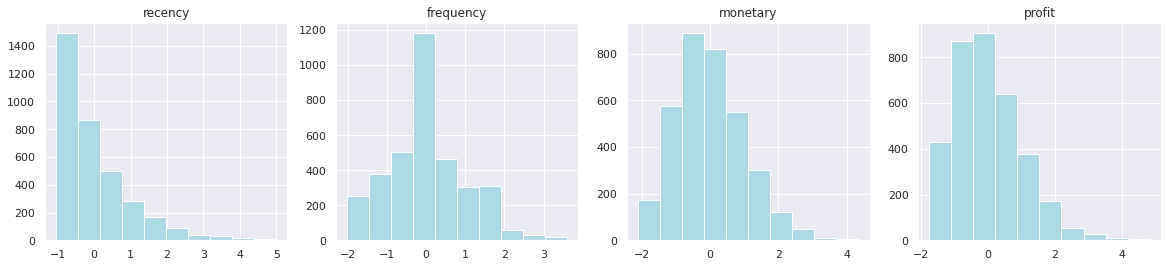

In [ ]:
column=['recency','frequency','monetary','profit']
def plotting_boxplot(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        plt.hist(rfm_std[col], color = 'lightblue')
        plt.title(col)
        i = i+1
    plt.show()
plotting_boxplot(column)

## Define K value

### Elbow Method

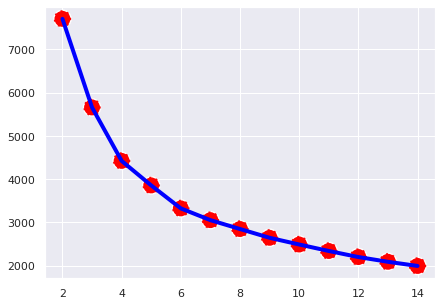

In [ ]:
from sklearn.cluster import KMeans #K-Means Clustering
inertia = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm_std.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))

sns.lineplot(x=range(2, 15), y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='red',  linestyle='--')
plt.show()

it's look like the elbow is on 4,so we define it become our K value

## Modeling 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=40)

kl = kmeans.fit(rfm_std.values)
labels_cluster = kl.labels_

In [ ]:
data_cluster4 = rfm_std.assign(Cluster = labels_cluster)
clustering4 = rfmSegmentation.assign(Cluster = labels_cluster)

In [ ]:
data_cluster4

recency  frequency  monetary    profit  Cluster
customer_id                                                  
1.0         -0.931638   2.307551  0.952134 -0.062256        1
2.0          1.141200  -1.154457 -0.723359 -0.509546        3
3.0          0.695797   1.009298  1.225006  0.132470        2
4.0          2.288970  -1.587208 -1.776224 -1.642524        3
5.0         -0.777460   0.143796 -0.127856 -0.414262        2
...               ...        ...       ...       ...      ...
3497.0      -0.160748  -1.154457 -0.860851 -0.836014        0
3498.0       1.124069   0.143796 -0.374371  0.010749        2
3499.0      -0.177879   0.576547  0.473129  1.032010        2
3500.0       1.415294   0.143796 -0.460821 -0.758320        3
5034.0       0.387441  -1.154457 -1.615919 -1.614892        0

[3494 rows x 5 columns]

In [ ]:
clustering4

recency  frequency  monetary       profit  Cluster
customer_id                                                    
1.0                7         11   9084.45  3018.090000        1
2.0              128          3   4149.07  2226.260000        3
3.0              102          8   9888.23  3362.810000        2
4.0              195          2   1047.72   220.570000        3
5.0               16          6   5903.20  2394.940000        2
...              ...        ...       ...          ...      ...
3497.0            52          3   3744.07  1648.320000        0
3498.0           127          6   5177.06  3147.330000        2
3499.0            51          7   7673.48  4955.250000        2
3500.0           144          6   4922.41  1785.860000        3
5034.0            84          3   1519.92   269.484972        0

[3494 rows x 5 columns]

## Plotting

### RF

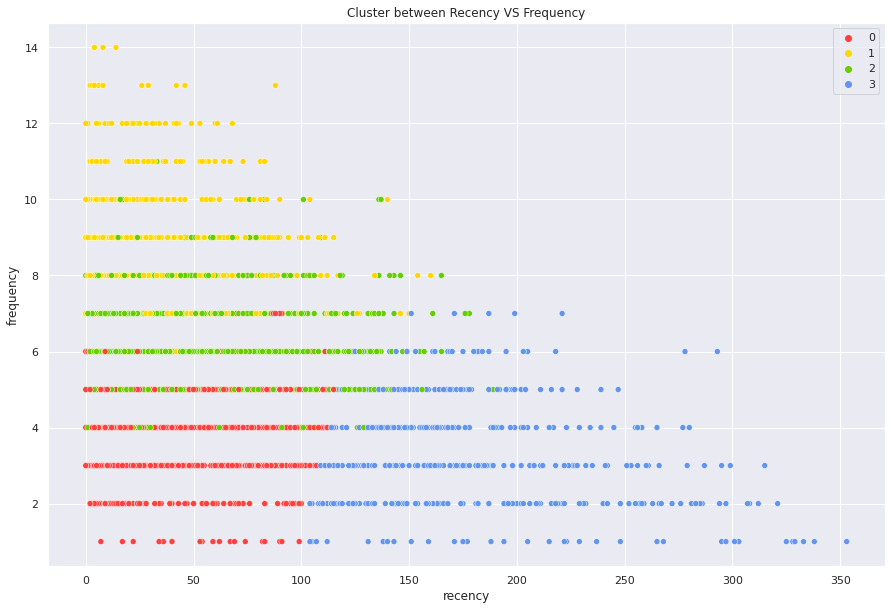

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['frequency'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Frequency")
plt.legend()
plt.show()

### RM

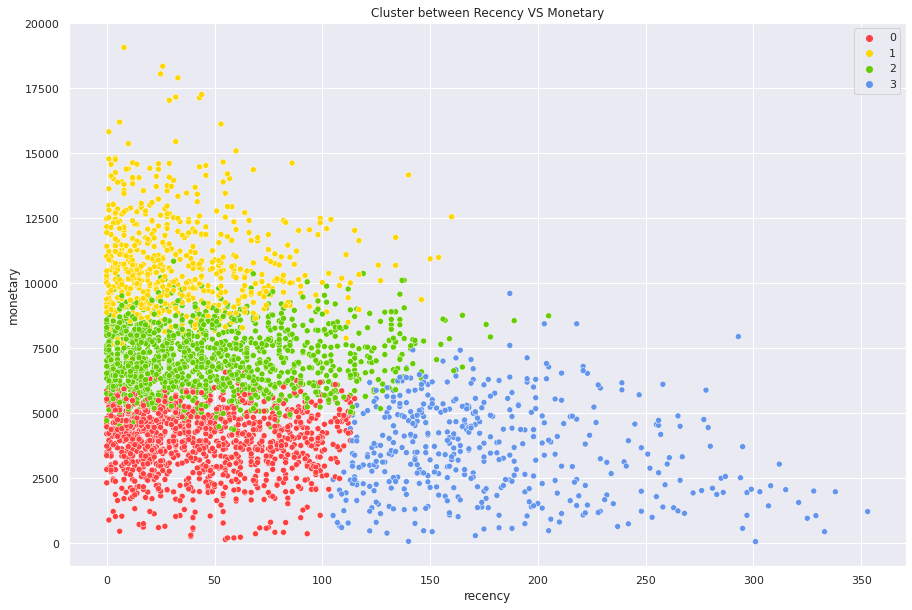

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['monetary'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Monetary")
plt.legend()
plt.show()

### RP

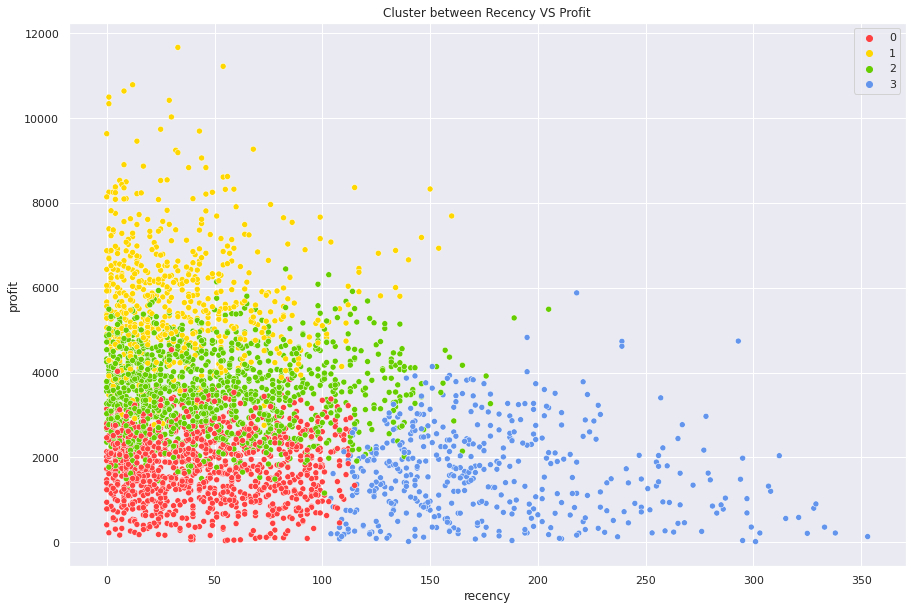

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['recency'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Recency VS Profit")
plt.legend()
plt.show()

### FM

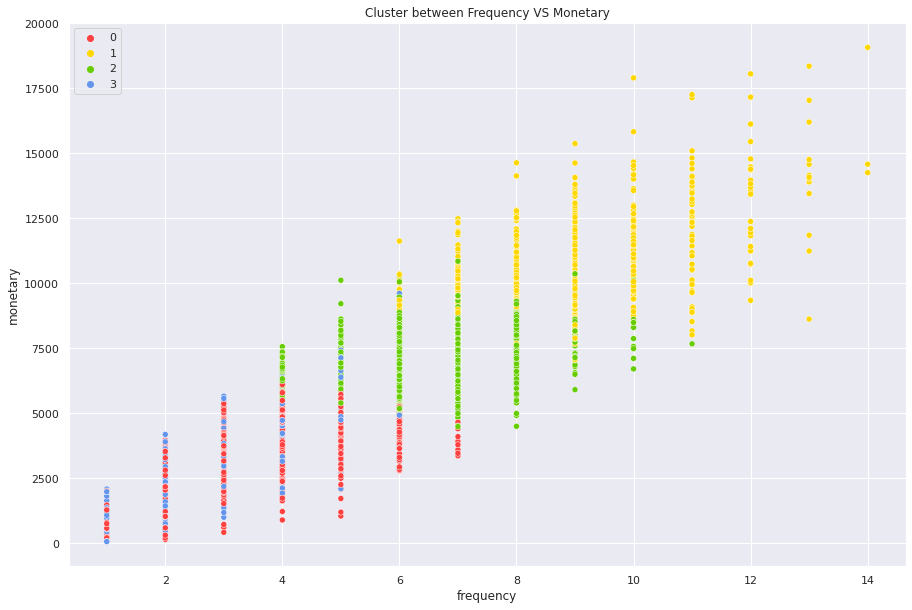

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['frequency'], y = clustering4['monetary'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Monetary")
plt.legend()
plt.show()

###FP

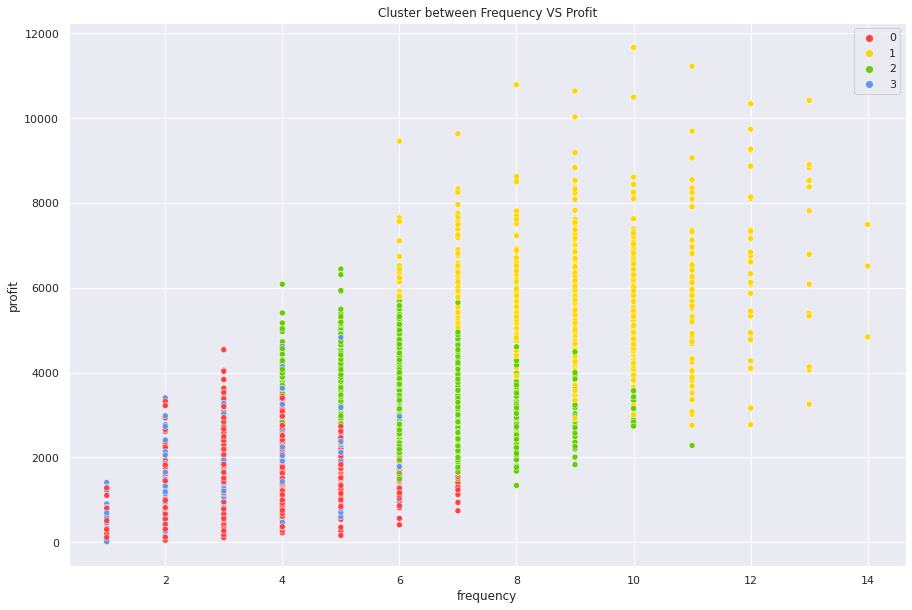

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['frequency'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Frequency VS Profit")
plt.legend()
plt.show()

### MP

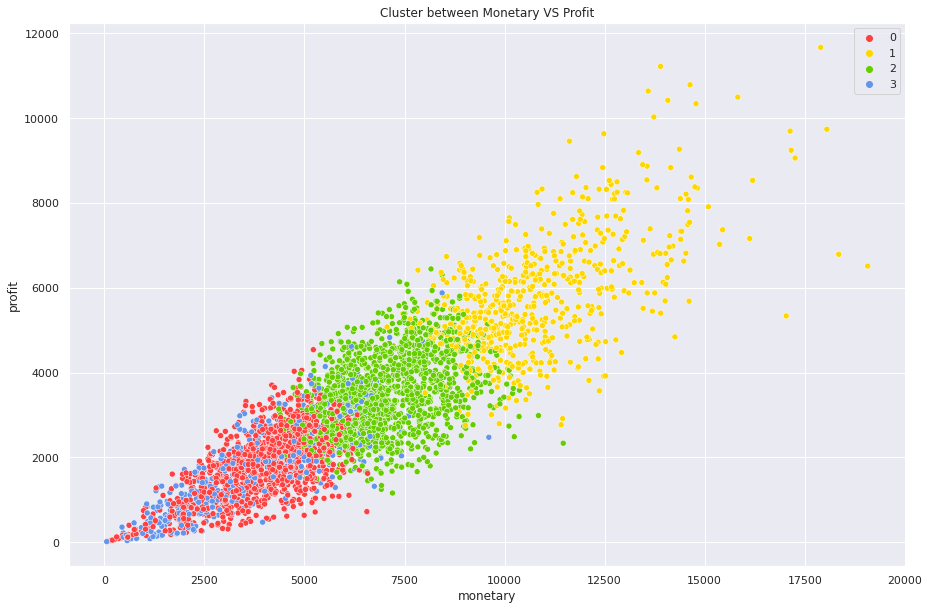

In [ ]:
#Pallete
pal = ["#FF4040","#FFD700", "#66CD00","#6495ED"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = clustering4, x = clustering4['monetary'], y = clustering4['profit'], hue = clustering4["Cluster"], palette= pal)
pl.set_title("Cluster between Monetary VS Profit")
plt.legend()
plt.show()

# Get the Targeted Customer

In [ ]:
clustering4['Cluster'].value_counts()

2    1320
0    1097
1     615
3     462
Name: Cluster, dtype: int64

In [ ]:
clustering4.head()

recency  frequency  monetary   profit  Cluster
customer_id                                                
1.0                7         11   9084.45  3018.09        1
2.0              128          3   4149.07  2226.26        3
3.0              102          8   9888.23  3362.81        2
4.0              195          2   1047.72   220.57        3
5.0               16          6   5903.20  2394.94        2

In [ ]:
targeted_customer = clustering4.rename_axis('customer_id').reset_index()

In [ ]:
subset_customer = customer[['customer_id','job_industry_category','wealth_segment','owns_car','tenure']]

In [ ]:
subset_address = address[['customer_id','state']]

In [ ]:
subset_transaction = transaction[['customer_id','transaction_date','brand','product_line','product_class','product_size']]

In [ ]:
targeted_customer = targeted_customer.merge(subset_customer, how='outer', on='customer_id')

In [ ]:
targeted_customer.head()

customer_id  recency  frequency  monetary   profit  Cluster  \
0          1.0      7.0       11.0   9084.45  3018.09      1.0   
1          2.0    128.0        3.0   4149.07  2226.26      3.0   
2          3.0    102.0        8.0   9888.23  3362.81      2.0   
3          4.0    195.0        2.0   1047.72   220.57      3.0   
4          5.0     16.0        6.0   5903.20  2394.94      2.0   

  job_industry_category     wealth_segment owns_car  tenure  
0                Health      Mass Customer      Yes    11.0  
1    Financial Services      Mass Customer      Yes    16.0  
2              Property      Mass Customer      Yes    15.0  
3                    IT      Mass Customer       No     7.0  
4                 other  Affluent Customer      Yes     8.0

In [ ]:
targeted_customer = targeted_customer.merge(subset_address, how='outer', on='customer_id')

In [ ]:
targeted_customer

customer_id  recency  frequency  monetary   profit  Cluster  \
0             1.0      7.0       11.0   9084.45  3018.09      1.0   
1             2.0    128.0        3.0   4149.07  2226.26      3.0   
2             3.0    102.0        8.0   9888.23  3362.81      2.0   
3             4.0    195.0        2.0   1047.72   220.57      3.0   
4             5.0     16.0        6.0   5903.20  2394.94      2.0   
...           ...      ...        ...       ...      ...      ...   
3999       3935.0      NaN        NaN       NaN      NaN      NaN   
4000       3998.0      NaN        NaN       NaN      NaN      NaN   
4001       4001.0      NaN        NaN       NaN      NaN      NaN   
4002       4002.0      NaN        NaN       NaN      NaN      NaN   
4003       4003.0      NaN        NaN       NaN      NaN      NaN   

     job_industry_category     wealth_segment owns_car  tenure state  
0                   Health      Mass Customer      Yes    11.0   NSW  
1       Financial Services      Mass Customer      Yes    16.0   NSW  
2                 Property      Mass Customer      Yes    15.0   NaN  
3                       IT      Mass Customer       No     7.0   QLD  
4                    other  Affluent Customer      Yes     8.0   NSW  
...                    ...                ...      ...     ...   ...  
3999                    IT     High Net Worth      Yes     NaN   VIC  
4000                    IT     High Net Worth       No     NaN   NSW  
4001                   NaN                NaN      NaN     NaN   NSW  
4002                   NaN                NaN      NaN     NaN   QLD  
4003                   NaN                NaN      NaN     NaN   NSW  

[4004 rows x 11 columns]

In [ ]:
clustering4.shape

(3494, 5)

In [ ]:
targeted_customer.dropna(subset = ['recency'], inplace=True)

In [ ]:
targeted_customer.shape

(3494, 11)

In [ ]:
targeted_customer

customer_id  recency  frequency  monetary       profit  Cluster  \
0             1.0      7.0       11.0   9084.45  3018.090000      1.0   
1             2.0    128.0        3.0   4149.07  2226.260000      3.0   
2             3.0    102.0        8.0   9888.23  3362.810000      2.0   
3             4.0    195.0        2.0   1047.72   220.570000      3.0   
4             5.0     16.0        6.0   5903.20  2394.940000      2.0   
...           ...      ...        ...       ...          ...      ...   
3489       3497.0     52.0        3.0   3744.07  1648.320000      0.0   
3490       3498.0    127.0        6.0   5177.06  3147.330000      2.0   
3491       3499.0     51.0        7.0   7673.48  4955.250000      2.0   
3492       3500.0    144.0        6.0   4922.41  1785.860000      3.0   
3493       5034.0     84.0        3.0   1519.92   269.484972      0.0   

     job_industry_category     wealth_segment owns_car  tenure state  
0                   Health      Mass Customer      Yes    11.0   NSW  
1       Financial Services      Mass Customer      Yes    16.0   NSW  
2                 Property      Mass Customer      Yes    15.0   NaN  
3                       IT      Mass Customer       No     7.0   QLD  
4                    other  Affluent Customer      Yes     8.0   NSW  
...                    ...                ...      ...     ...   ...  
3489         Manufacturing  Affluent Customer      Yes    18.0   VIC  
3490         Manufacturing      Mass Customer       No     5.0   VIC  
3491         Manufacturing      Mass Customer      Yes     7.0   QLD  
3492         Entertainment  Affluent Customer       No    17.0   NSW  
3493                   NaN                NaN      NaN     NaN   NaN  

[3494 rows x 11 columns]

In [ ]:
targeted_customer['Cluster'] = targeted_customer['Cluster'].astype("object")

In [ ]:
subset_cluster = targeted_customer[['customer_id','Cluster']]

In [ ]:
subset_transac = subset_transaction.merge(subset_cluster, how='outer', on='customer_id')

In [ ]:
subset_transac.head(2)

customer_id transaction_date           brand product_line product_class  \
0      2950.0       2017-02-25           Solex     Standard        medium   
1      2950.0       2017-10-16  Giant Bicycles     Standard        medium   

  product_size Cluster  
0       medium     0.0  
1       medium     0.0

In [ ]:
subset_transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       19803 non-null  object
 1   transaction_date  19803 non-null  object
 2   brand             19803 non-null  object
 3   product_line      19803 non-null  object
 4   product_class     19803 non-null  object
 5   product_size      19803 non-null  object
 6   Cluster           19803 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [ ]:
subset_transac['transaction_date'] = pd.to_datetime(subset_transac['transaction_date'])

In [ ]:
subset_transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19802
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       19803 non-null  object        
 1   transaction_date  19803 non-null  datetime64[ns]
 2   brand             19803 non-null  object        
 3   product_line      19803 non-null  object        
 4   product_class     19803 non-null  object        
 5   product_size      19803 non-null  object        
 6   Cluster           19803 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ MB


**download the dataset**

In [ ]:
#targeted_customer.to_csv('targeted_customerxx.csv', header=True, index=False)

In [ ]:
#from google.colab import files
#targeted_customer.to_csv('targeted_customerxx.csv', header=True, index=False) 
#files.download('targeted_customerxx.csv')

In [ ]:
from google.colab import files
subset_transac.to_csv('subset_transac.csv', header=True, index=False) 
files.download('subset_transac.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>